In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from GA_functions import fitness, select_parents, crossover, mutation, GA_algorithm, GA_algorithm_unnormalized, conc_to_spectra, perform_iteration, set_seed #normalize_and_pca
from MCTS_v2_functions import zeroth_iteration, nth_iteration, plot_fitness, plot_spectra

## Initialize and Load Data

In [31]:
#This block of code creates random concentrations and spectra to start the algorithm. 
Sample_concentrations = pd.read_excel('Sample_concentrations.xlsx')
red_conc = Sample_concentrations[['Red vol frac']].values
green_conc = Sample_concentrations[['Green vol frac']].values
blue_conc = Sample_concentrations[['Blue vol frac']].values
sample_conc = np.hstack((red_conc, green_conc, blue_conc))

sample_spectra = pd.read_excel('Sample_spectra.xlsx')
sample_spectra = np.asarray(sample_spectra)
red = sample_spectra[:,1]
green = sample_spectra[:,2]
blue = sample_spectra[:,3]
wavelength = sample_spectra[:,0]


################ INPUTS #####################################################################
np.random.seed(2)
conc_array = np.random.dirichlet((1, 1,1), 23)
spectra_array = conc_to_spectra(conc_array, sample_spectra[:,1:conc_array.shape[1]+1])
#############################################################################################

conc_array_actual = conc_array
spectra_array_actual = spectra_array

#Change Desired Spectra 
objective_row = -5
##################### INPUT ################################################################
x_test = sample_spectra[:,objective_row].reshape(-1,1) 
############################################################################################
target_conc = sample_conc[objective_row,:]
print(target_conc)



[0.25961789 0.35402194 0.38636017]


In [32]:
def perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual):
    current_gen_spectra = conc_to_spectra(next_gen_conc, sample_spectra[:,1:sample_conc.shape[1]+1])
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual

def export_to_csv(conc_array):
    sample_volume = 300 #uL 
    conc_array = conc_array*sample_volume
    df = pd.DataFrame(conc_array, columns =['red-stock', 'green-stock', 'blue-stock'])
    df.to_csv("concentration_array.csv", index = False)

def import_from_excel(filename, conc_array_actual, spectra_array_actual):
    sample_spectra = pd.read_excel(filename)
    current_gen_spectra = np.asarray(sample_spectra)
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual 

In [33]:
conc_array

array([[0.41002688, 0.01880712, 0.571166  ],
       [0.37652229, 0.35930123, 0.26417647],
       [0.14764527, 0.62268162, 0.22967311],
       [0.15258201, 0.47714012, 0.37027786],
       [0.13519817, 0.67409914, 0.19070269],
       [0.37127166, 0.46424227, 0.16448607],
       [0.70437887, 0.03118819, 0.26443294],
       [0.09275868, 0.7677728 , 0.13946852],
       [0.1045864 , 0.69839644, 0.19701716],
       [0.14272691, 0.31402025, 0.54325284],
       [0.33569619, 0.11992904, 0.54437477],
       [0.35614711, 0.3798031 , 0.26404979],
       [0.60171037, 0.33076689, 0.06752274],
       [0.23027531, 0.63742409, 0.1323006 ],
       [0.63700739, 0.12086031, 0.24213231],
       [0.21206298, 0.21822312, 0.5697139 ],
       [0.16579646, 0.66436471, 0.16983883],
       [0.03503939, 0.18662573, 0.77833487],
       [0.62597468, 0.03311449, 0.34091083],
       [0.00800081, 0.5861054 , 0.40589379],
       [0.40474954, 0.23139261, 0.36385784],
       [0.14545122, 0.27204512, 0.58250366],
       [0.

## Analyze Fitness of Zeroth Iteration

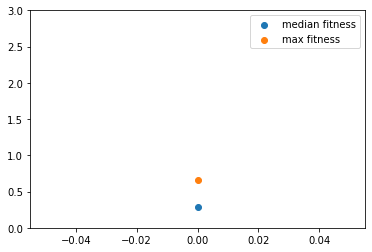

The max fitness is: 0.6527643093235957
The median fitness is: 0.28427805117910343


In [34]:
next_gen_conc, current_gen_spectra, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, fitness_multiplier_list = zeroth_iteration(conc_array, spectra_array, x_test)

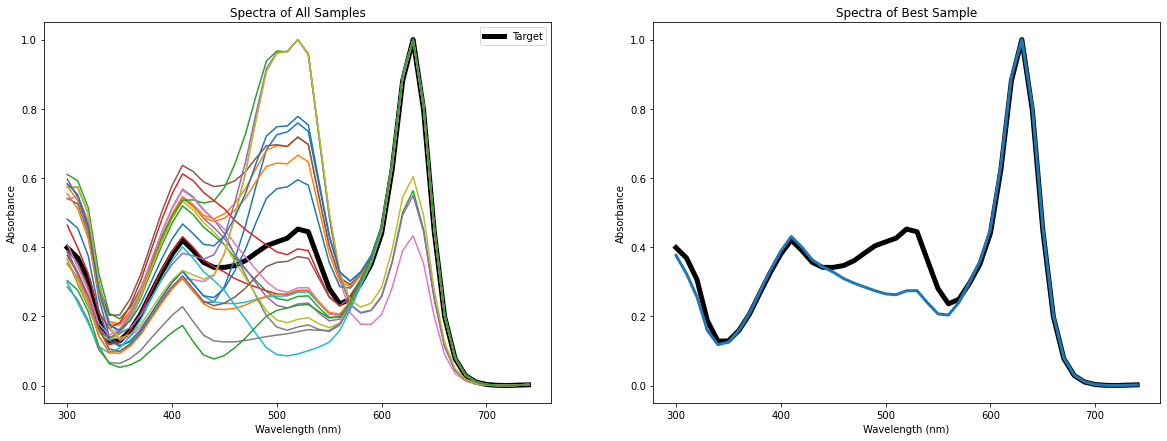

In [35]:
plot_spectra(current_gen_spectra, x_test, wavelength)

## Nth Iteration 

In [36]:
for i in range(spectra_array_actual.shape[0]):
    for j in range(spectra_array_actual.shape[1]):
        a = np.random.rand(1)[0]
        if a < 0.05:
            spectra_array_actual[i,j] = spectra_array_actual[i,j] + np.random.randn(1)[0]

In [37]:
Iterations = 20 #sample size for GA 
Moves_ahead = 3 #moves ahead that are calculated 
GA_iterations = 6 #times per move that the GA is used 
n_samples = 23 #sample size
seed = 2
mutation_rate, fitness_multiplier, mutation_rate_list, fitness_multiplier_list, best_move, best_move_turn, max_fitness, surrogate_score, next_gen_conc = nth_iteration(Iterations, Moves_ahead, GA_iterations, n_samples, current_gen_spectra, next_gen_conc, x_test, conc_array_actual, spectra_array_actual, seed, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, fitness_multiplier_list)

The best move has a fitness value of 0.5090998658825802
The best move occurs in 1 turns.

The surrogate model has a score of: 0.9644072009333553

[[0.22615536 0.63716814 0.1366765 ]
 [0.42236025 0.18495514 0.39268461]
 [0.22088353 0.63955823 0.13955823]
 [0.23493361 0.65066394 0.11440245]
 [0.22840119 0.53426018 0.23733863]
 [0.22001982 0.2160555  0.56392468]
 [0.15901302 0.43522961 0.40575737]
 [0.02803738 0.62383178 0.34813084]
 [0.20394737 0.58082707 0.21522556]
 [0.20804711 0.21393523 0.57801766]
 [0.23581758 0.13125695 0.63292547]
 [0.21221221 0.21821822 0.56956957]
 [0.12432432 0.35567568 0.52      ]
 [0.23153693 0.23752495 0.53093812]
 [0.17681401 0.18181818 0.64136781]
 [0.14616498 0.46164978 0.39218524]
 [0.27315248 0.19457437 0.53227315]
 [0.18261413 0.48030019 0.33708568]
 [0.21635095 0.21635095 0.56729811]
 [0.20866142 0.21161417 0.57972441]
 [0.21221221 0.21821822 0.56956957]
 [0.22794846 0.63131814 0.1407334 ]
 [0.37953795 0.39108911 0.22937294]]


In [38]:
current_gen_spectra, conc_array_actual, spectra_array_actual = perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual)

In [18]:
for i in range(current_gen_spectra.shape[0]):
    for j in range(current_gen_spectra.shape[1]):
        a = np.random.rand(1)[0]
        if a < 0.05:
            current_gen_spectra[i,j] = current_gen_spectra[i,j] + np.random.randn(1)[0]

In [19]:
for i in range(spectra_array_actual.shape[0]):
    for j in range(spectra_array_actual.shape[1]):
        a = np.random.rand(1)[0]
        if a < 0.05:
            spectra_array_actual[i,j] = spectra_array_actual[i,j] + np.random.randn(1)[0]

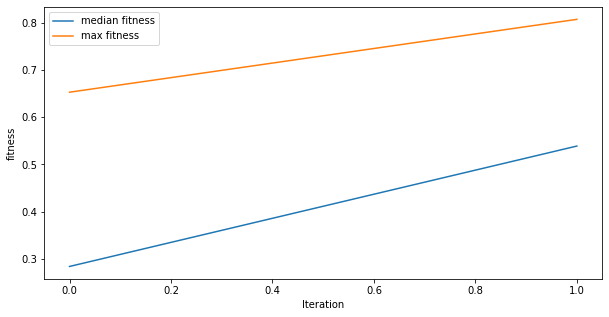

The max fitness is: 0.8068258264292322
The median fitness is: 0.5388645206834338


In [39]:
median_fitness_list, max_fitness_list, iteration = plot_fitness(next_gen_conc, current_gen_spectra, x_test, median_fitness_list, max_fitness_list, iteration)

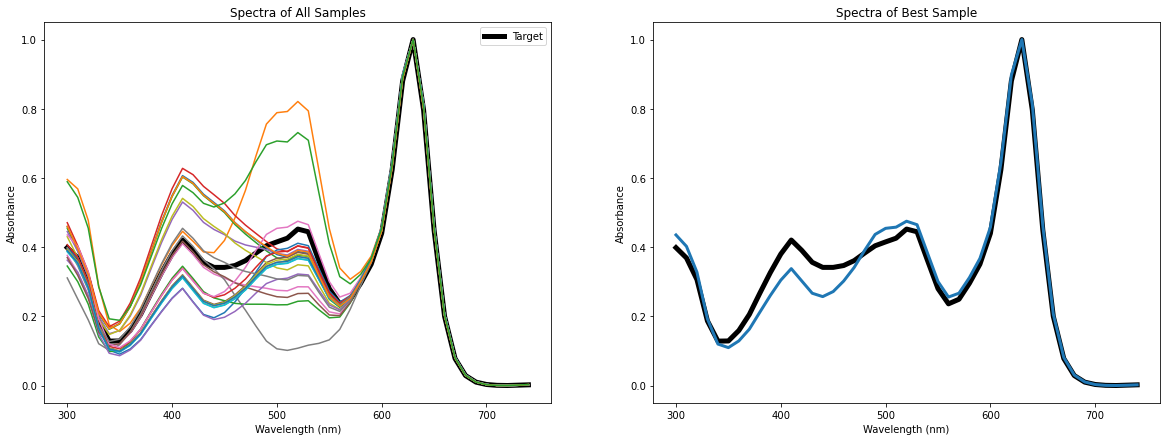

In [40]:
plot_spectra(current_gen_spectra, x_test, wavelength)

In [41]:
mutation_rate_list

[0.39]

In [42]:
fitness_multiplier_list

[5.04]

In [29]:
spectra_array_actual.shape

(92, 45)